In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/d/jainilcoder/netflix-stock-price-prediction/NFLX.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.drop(['Adj Close', 'Date'], axis=1, inplace=True)

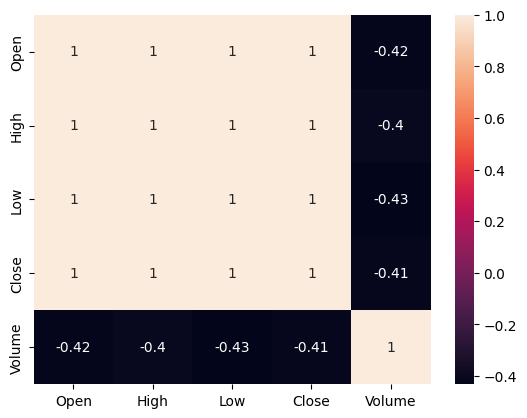

In [7]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<Axes: >

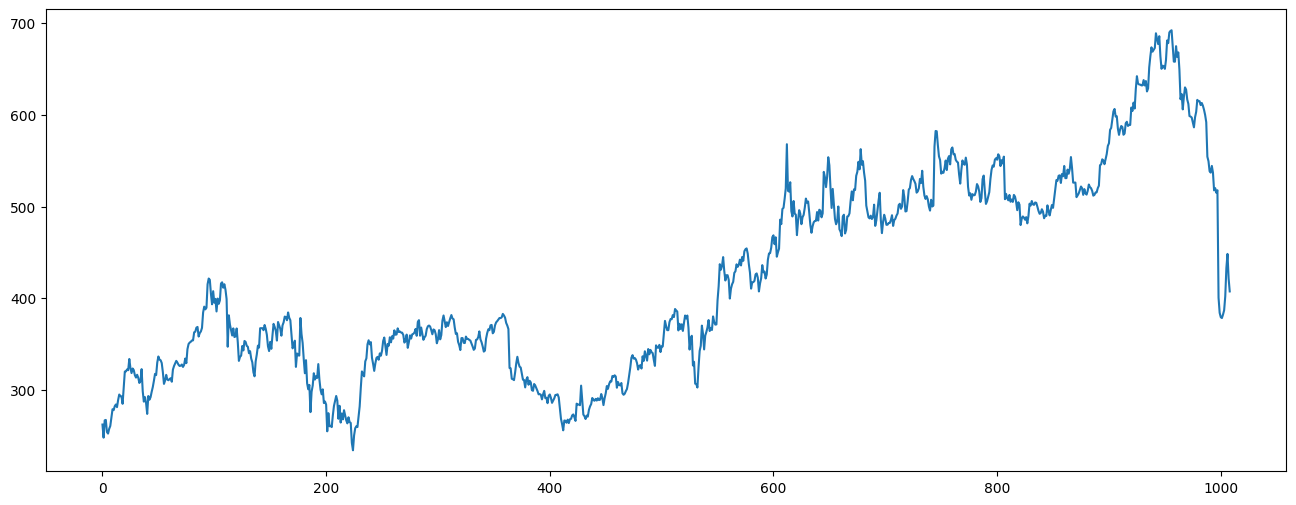

In [8]:
df['Open'].plot(figsize=(16,6))

#### Data Preparation

In [10]:
X = df.drop(['Close'], axis=1)
Y = df['Close']

In [11]:
X.shape

(1009, 4)

In [12]:
Y.shape

(1009,)

In [13]:
X_scaled = preprocessing.scale(X)

In [14]:
X_scaled

array([[-1.44777164, -1.4414654 , -1.51014126,  0.7917907 ],
       [-1.57958866, -1.45245336, -1.55693083,  0.91987459],
       [-1.40555345, -1.39980192, -1.37712127,  0.25825734],
       ...,
       [ 0.26907561,  0.24411318,  0.13121518,  1.2402582 ],
       [ 0.02194181,  0.03607133, -0.07529165,  0.42734564],
       [-0.10830817, -0.11492402, -0.14635958,  0.03875557]])

#### Model Training and Predictions

In [15]:
model = LinearRegression()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
model_score = model.score(x_test, y_test)
w = model.coef_
b = model.intercept_

In [23]:
y_pred = model.predict(x_test)

#### w & b with Model Score

In [29]:
print(f"Model Score : {model_score}")
print(f"W : {w}")
print(f"b : {b}")

Model Score : 0.9986297713881579
W : [-68.0947707   87.25456191  89.15669533   0.5836817 ]
b : 419.1111274091203


In [31]:
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error : {np.sqrt(mse)}")

Mean Absolute Error : 2.857186533234379
R2 Score : 0.9986297713881579
Root Mean Squared Error : 3.9971172232628516
